## 5-year split for MACD strategies

In [2]:
from preprocess import prep_all_movavg, prep_movavg_mod, prep_all_stoch, prep_stoch_mod
from tradesim_stoch import simulate as sim_alt
from tradesim_sma_daily import simulate, sim_buy_hold_eq
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

### 1-month alt strategy

In [3]:
# ticker prep
df_xlvtick = pd.read_csv('XLV.csv')
tick_list = df_xlvtick['Ticker'].tolist()

In [5]:
df_list = prep_all_stoch(tick_list)

In [42]:
start = pd.to_datetime('01/03/00')
funds = 1000000
days=21
cycle=60

In [43]:
stoch_1_fund_df1, stoch_1_final_funds1 = sim_alt(funds, df_list, start, days, cycle)

In [44]:
start = pd.to_datetime('01/10/05')

In [45]:
stoch_1_fund_df2, stoch_1_final_funds2 = sim_alt(funds, df_list, start, days, cycle)

In [46]:
start = pd.to_datetime('01/13/10')

In [47]:
stoch_1_fund_df3, stoch_1_final_funds3 = sim_alt(funds, df_list, start, days, cycle)

In [48]:
start = pd.to_datetime('01/16/15')

In [49]:
stoch_1_fund_df4, stoch_1_final_funds4 = sim_alt(funds, df_list, start, days, cycle)

### 2-month alt strategy

In [34]:
start = pd.to_datetime('01/03/00')
funds = 1000000
days=42
cycle=30

In [35]:
stoch_2_fund_df1, stoch_2_final_funds1 = sim_alt(funds, df_list, start, days, cycle)

In [36]:
start = pd.to_datetime('01/10/05')

In [37]:
stoch_2_fund_df2, stoch_2_final_funds2 = sim_alt(funds, df_list, start, days, cycle)

In [38]:
start = pd.to_datetime('01/13/10')

In [39]:
stoch_2_fund_df3, stoch_2_final_funds3 = sim_alt(funds, df_list, start, days, cycle)

In [40]:
start = pd.to_datetime('01/16/15')

In [41]:
stoch_2_fund_df4, stoch_2_final_funds4 = sim_alt(funds, df_list, start, days, cycle)

In [56]:
stoch_2_fund_df1

,date,curr_fund,num_stocks
0,2000-01-03,1000000,0
1,2000-03-03,1803482.587065,1
2,2000-05-03,2207931.47599,4
3,2000-07-03,2409724.988278,1
4,2000-08-31,2330487.296266,1
5,2000-10-31,2381145.2874,2
6,2001-01-02,3098247.702593,2
7,2001-03-05,3098247.702593,0
8,2001-05-03,2917893.604345,7
9,2001-07-03,2858490.232921,1


### XLV equal-weight strategy

In [22]:
df_dict2 = prep_movavg_mod(tick_list)

In [23]:
start = pd.to_datetime('01/03/00')
end = pd.to_datetime('01/10/05')
funds1, current_val1, fund_df1 = sim_buy_hold_eq(funds, df_dict2, start, end)

In [24]:
start = pd.to_datetime('01/10/05')
end = pd.to_datetime('01/13/10')
funds2, current_val2, fund_df2 = sim_buy_hold_eq(funds, df_dict2, start, end)

In [25]:
start = pd.to_datetime('01/13/10')
end = pd.to_datetime('01/16/15')
funds3, current_val3, fund_df3 = sim_buy_hold_eq(funds, df_dict2, start, end)

In [26]:
start = pd.to_datetime('01/16/15')
end = pd.to_datetime('01/22/20')
funds4, current_val4, fund_df4 = sim_buy_hold_eq(funds, df_dict2, start, end)

## Comparison

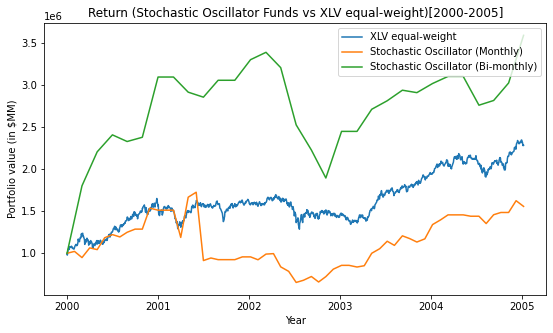

In [50]:
# Period 1 plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylabel('Portfolio value (in $MM)')
ax.set_xlabel('Year')
ax.plot(fund_df1['date'], fund_df1['curr_fund'], label='XLV equal-weight')
ax.plot(stoch_1_fund_df1['date'], stoch_1_fund_df1['curr_fund'], label='Stochastic Oscillator (Monthly)')
ax.plot(stoch_2_fund_df1['date'], stoch_2_fund_df1['curr_fund'], label='Stochastic Oscillator (Bi-monthly)')
ax.legend()
ax.set_title('Return (Stochastic Oscillator Funds vs XLV equal-weight)[2000-2005]')
plt.savefig('Stoch_5_Year_Split_Return1.png')

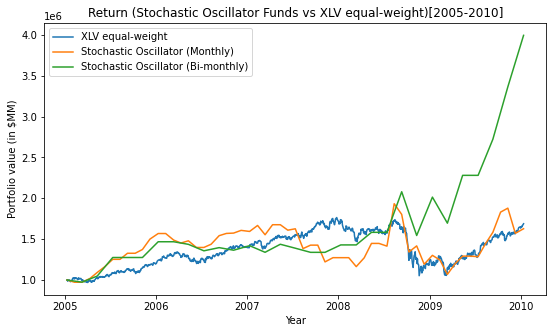

In [51]:
# Period 2 plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylabel('Portfolio value (in $MM)')
ax.set_xlabel('Year')
ax.plot(fund_df2['date'], fund_df2['curr_fund'], label='XLV equal-weight')
ax.plot(stoch_1_fund_df2['date'], stoch_1_fund_df2['curr_fund'], label='Stochastic Oscillator (Monthly)')
ax.plot(stoch_2_fund_df2['date'], stoch_2_fund_df2['curr_fund'], label='Stochastic Oscillator (Bi-monthly)')
ax.legend()
ax.set_title('Return (Stochastic Oscillator Funds vs XLV equal-weight)[2005-2010]')
plt.savefig('Stoch_5_Year_Split_Return2.png')

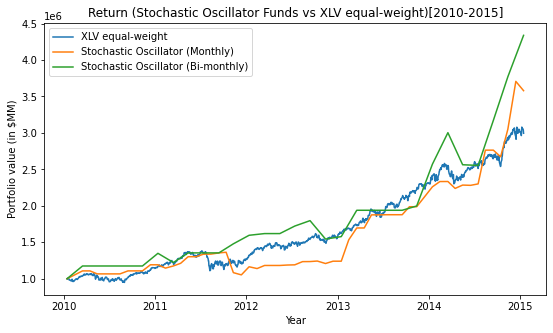

In [52]:
# Period 3 plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylabel('Portfolio value (in $MM)')
ax.set_xlabel('Year')
ax.plot(fund_df3['date'], fund_df3['curr_fund'], label='XLV equal-weight')
ax.plot(stoch_1_fund_df3['date'], stoch_1_fund_df3['curr_fund'], label='Stochastic Oscillator (Monthly)')
ax.plot(stoch_2_fund_df3['date'], stoch_2_fund_df3['curr_fund'], label='Stochastic Oscillator (Bi-monthly)')
ax.legend()
ax.set_title('Return (Stochastic Oscillator Funds vs XLV equal-weight)[2010-2015]')
plt.savefig('Stoch_5_Year_Split_Return3.png')

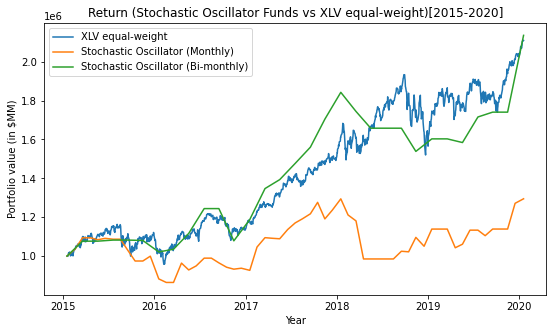

In [53]:
# Period 4 plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(9,5))
ax.set_ylabel('Portfolio value (in $MM)')
ax.set_xlabel('Year')
ax.plot(fund_df4['date'], fund_df4['curr_fund'], label='XLV equal-weight')
ax.plot(stoch_1_fund_df4['date'], stoch_1_fund_df4['curr_fund'], label='Stochastic Oscillator (Monthly)')
ax.plot(stoch_2_fund_df4['date'], stoch_2_fund_df4['curr_fund'], label='Stochastic Oscillator (Bi-monthly)')
ax.legend()
ax.set_title('Return (Stochastic Oscillator Funds vs XLV equal-weight)[2015-2020]')
plt.savefig('Stoch_5_Year_Split_Return4.png')